## Import all the required packages

In [1]:
from cartopy.io.shapereader import Reader
import numpy as np
import xarray as xr
import proplot as plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## Customize the Proplot package (optional)

In [35]:
plot.rc.reset()

# Font properties (self-explanatory)
plot.rc['font.weight']='bold'
plot.rc['font.size']=12

# Tick propreties (self-explanatory)
plot.rc['tick.labelsize']=10
plot.rc['xtick.minor.visible'] =   False
plot.rc['ytick.minor.visible']=   False
plot.rc['tick.len']=2
plot.rc['tick.dir']= 'out'
plot.rc['xtick.major.size']=3
plot.rc['ytick.major.size']=3

# Grid properties (self-explanatory)
plot.rc['grid']=False
plot.rc['grid.linewidth']=0.25
plot.rc['grid.linestyle']=(0, (5, 10))

# Misc
plot.rc['meta.width']=1.5 # Line width in the plots
plot.rc['subplots.tight']= True # Tight layout for the subplots
plot.rc['colorbar.insetpad']='0.5em' # Insert whitespace around the colorbar
plot.rc['label.size'] = 'medium'


## Using xarray to load the climate data
  
For this example, we will be using the Gridded Rainfall Data from [Indian Meteorological Department (IMD)](https://www.imdpune.gov.in/Clim_Pred_LRF_New/Grided_Data_Download.html) which is available as a netCDF (.nc ) file. NetCDF is the most commonly used file format to store gridded climate data which is also CF compliant. Download the .nc files from the given link : [Rainfall Data](https://www.imdpune.gov.in/Clim_Pred_LRF_New/Grided_Data_Download.html). 
  
+ **After you've downloaded the multiple .nc files, put them all in a folder of your choice.**
+ **We will use xarray to read all the multiple files at once and combine them into a single file for further use.**
+ **For now, we will use the already combined single imd.nc file**

In [36]:
#Open multiple datasets using xarray's open_mfdataset command. 
#To open a single nc file, you can use the xr.open_dataset() comamnd.

#ds = xr.open_mfdataset('/media/carbform/Study/IMD_data/rain1by1/*.nc') 

ds = xr.open_dataset('imd.nc') 

#### Change the file name and folder accordingly ####
# Check the properties of the loaded dataset by printing the variable
ds


<xarray.Dataset>
Dimensions:  (lon: 35, lat: 33, time: 21550)
Coordinates:
  * lon      (lon) float64 66.5 67.5 68.5 69.5 70.5 ... 97.5 98.5 99.5 100.5
  * lat      (lat) float64 6.5 7.5 8.5 9.5 10.5 ... 34.5 35.5 36.5 37.5 38.5
  * time     (time) datetime64[ns] 1960-01-01 1960-01-02 ... 2018-12-31
Data variables:
    rf       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.6.3 (http://code.zmaw.de/p...
    Conventions:  CF-1.4
    history:      Mon Jun 01 15:26:15 2020: cdo splityear ../imd_rf_1x1_1901_...
    CDO:          Climate Data Operators version 1.6.3 (http://code.zmaw.de/p...

**This dataset has only variable: rf. We can access this variable simply by using ds.rf command**
**The xarray package loads this as a Data Array which has three dimensions :**
+ Latitude (lat)
+ Longitude (lon)
+ Time (time)

**The picture below provides a useful visualization of how the gridded data is arranged**. For more info on how xarray works, click [here.](https://xarray.pydata.org/en/stable/)

In [37]:
ds.rf

<xarray.DataArray 'rf' (time: 21550, lat: 33, lon: 35)>
[24890250 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 66.5 67.5 68.5 69.5 70.5 ... 97.5 98.5 99.5 100.5
  * lat      (lat) float64 6.5 7.5 8.5 9.5 10.5 ... 34.5 35.5 36.5 37.5 38.5
  * time     (time) datetime64[ns] 1960-01-01 1960-01-02 ... 2018-12-31
Attributes:
    long_name:  GRIDDED RAINFALL

**Checking the longitude, latitude and time dimensions in the loaded xarray dataset**

In [38]:
ds.lon


<xarray.DataArray 'lon' (lon: 35)>
array([ 66.5,  67.5,  68.5,  69.5,  70.5,  71.5,  72.5,  73.5,  74.5,  75.5,
        76.5,  77.5,  78.5,  79.5,  80.5,  81.5,  82.5,  83.5,  84.5,  85.5,
        86.5,  87.5,  88.5,  89.5,  90.5,  91.5,  92.5,  93.5,  94.5,  95.5,
        96.5,  97.5,  98.5,  99.5, 100.5])
Coordinates:
  * lon      (lon) float64 66.5 67.5 68.5 69.5 70.5 ... 97.5 98.5 99.5 100.5
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

In [39]:
ds.lat

<xarray.DataArray 'lat' (lat: 33)>
array([ 6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5,
       18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5,
       30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5])
Coordinates:
  * lat      (lat) float64 6.5 7.5 8.5 9.5 10.5 ... 34.5 35.5 36.5 37.5 38.5
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [40]:
ds.time

<xarray.DataArray 'time' (time: 21550)>
array(['1960-01-01T00:00:00.000000000', '1960-01-02T00:00:00.000000000',
       '1960-01-03T00:00:00.000000000', ..., '2018-12-29T00:00:00.000000000',
       '2018-12-30T00:00:00.000000000', '2018-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-01-02 ... 2018-12-31
Attributes:
    standard_name:  time

## Performing operations on the rainfall data

**First, we will slice/select the data according to our needs**
+ Selecting a specific date, **for example 1995-05-17**
+ Selecting a specific location (latitude and longitude): **Latitude : 18.5, Longitdue: 82.5**

**To perform operations on all the variables in the dataset, we can directly use the original dataset variable (ds).
To perform operations on a specific variable, such as rainfall (rf), we can explicitly pass the variable name (ds.rf) before performing any operation.**
 
+ In our case, since we have only one variable, we can also directly operate on **ds** without specifying the variable.
+ However, to be as general as possible, we will explicitly pass the **rainfall (ds.rf)** variable before performing any operation.

In [41]:
ds_sel_time = ds.rf.sel(time='1995-05-17T00:00:00.000000000') # time selection
ds_sel_loc = ds.rf.sel(lat=18.5,lon=82.5) # location selection

In [42]:
ds_sel_time # This is a 2-D array of rainfall values on that particular time value.

<xarray.DataArray 'rf' (lat: 33, lon: 35)>
[1155 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 66.5 67.5 68.5 69.5 70.5 ... 97.5 98.5 99.5 100.5
  * lat      (lat) float64 6.5 7.5 8.5 9.5 10.5 ... 34.5 35.5 36.5 37.5 38.5
    time     datetime64[ns] 1995-05-17
Attributes:
    long_name:  GRIDDED RAINFALL

In [43]:
ds_sel_loc # This is 1-D time-series of rainfall values for that particular location.

<xarray.DataArray 'rf' (time: 21550)>
[21550 values with dtype=float32]
Coordinates:
    lon      float64 82.5
    lat      float64 18.5
  * time     (time) datetime64[ns] 1960-01-01 1960-01-02 ... 2018-12-31
Attributes:
    long_name:  GRIDDED RAINFALL

**We can also use the isel() function to use indices to select and subset the data**
+ Selecting a specific date using the index (0): **for example the first time step which is 1901-01-01**
+ Selecting a specific location using the index (10,10)(latitude and longitude): **Latitude : 16.5, Longitdue: 76.5**

In [44]:
ds_sel_time_idx = ds.rf.isel(time=0) # time selection
ds_sel_loc_idx = ds.rf.isel(lat=10,lon=10) # location selection

In [45]:
ds_sel_time_idx # This is a 2-D array of rainfall values on that particular time value.

<xarray.DataArray 'rf' (lat: 33, lon: 35)>
[1155 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 66.5 67.5 68.5 69.5 70.5 ... 97.5 98.5 99.5 100.5
  * lat      (lat) float64 6.5 7.5 8.5 9.5 10.5 ... 34.5 35.5 36.5 37.5 38.5
    time     datetime64[ns] 1960-01-01
Attributes:
    long_name:  GRIDDED RAINFALL

In [46]:
ds_sel_loc_idx # This is a 2-D array of rainfall values on that particular time value.

<xarray.DataArray 'rf' (time: 21550)>
[21550 values with dtype=float32]
Coordinates:
    lon      float64 76.5
    lat      float64 16.5
  * time     (time) datetime64[ns] 1960-01-01 1960-01-02 ... 2018-12-31
Attributes:
    long_name:  GRIDDED RAINFALL

## **Now, we will perform operations on the time axis of the rainfall dataset.**
+ Mean over time
+ Variance over time
+ Grouping over time
+ Resampling over time

P.S: These operations can be perorfmed along any dimension other than time.

In [47]:
# Mean and Variance of the data along the time axis.
ds_mean = ds.rf.mean('time')
ds_var = ds.rf.var('time')

In [48]:
ds_mean

<xarray.DataArray 'rf' (lat: 33, lon: 35)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 66.5 67.5 68.5 69.5 70.5 ... 97.5 98.5 99.5 100.5
  * lat      (lat) float64 6.5 7.5 8.5 9.5 10.5 ... 34.5 35.5 36.5 37.5 38.5

In [49]:
ds_var

<xarray.DataArray 'rf' (lat: 33, lon: 35)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 66.5 67.5 68.5 69.5 70.5 ... 97.5 98.5 99.5 100.5
  * lat      (lat) float64 6.5 7.5 8.5 9.5 10.5 ... 34.5 35.5 36.5 37.5 38.5

**We can also group the data along the time axis into either hours, days, months and years. The, we can apply methods such as mean and variance to the grouped dataset.**

In [50]:
ds_year=ds.groupby('time.year') # Also, we can use 'time.month',  'time.day' and 'time.dayofyear' for grouping.
ds_year_mean = ds_year.mean('time') 
ds_year_mean # Annual mean rainfall

<xarray.Dataset>
Dimensions:  (lon: 35, lat: 33, year: 59)
Coordinates:
  * lon      (lon) float64 66.5 67.5 68.5 69.5 70.5 ... 97.5 98.5 99.5 100.5
  * lat      (lat) float64 6.5 7.5 8.5 9.5 10.5 ... 34.5 35.5 36.5 37.5 38.5
  * year     (year) int64 1960 1961 1962 1963 1964 ... 2014 2015 2016 2017 2018
Data variables:
    rf       (year, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.6.3 (http://code.zmaw.de/p...
    Conventions:  CF-1.4
    history:      Mon Jun 01 15:26:15 2020: cdo splityear ../imd_rf_1x1_1901_...
    CDO:          Climate Data Operators version 1.6.3 (http://code.zmaw.de/p...

**Using the 'time.dayofyear' argument to get the daily climatology of rainfall**

In [51]:
ds_daily_clim=ds.groupby('time.dayofyear').mean('time') # we get the mean of each day across all years
ds_daily_clim
# notice that the final dimensions are (lat,lon,dayofyear)

<xarray.Dataset>
Dimensions:    (lon: 35, lat: 33, dayofyear: 366)
Coordinates:
  * lon        (lon) float64 66.5 67.5 68.5 69.5 70.5 ... 97.5 98.5 99.5 100.5
  * lat        (lat) float64 6.5 7.5 8.5 9.5 10.5 ... 34.5 35.5 36.5 37.5 38.5
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    rf         (dayofyear, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.6.3 (http://code.zmaw.de/p...
    Conventions:  CF-1.4
    history:      Mon Jun 01 15:26:15 2020: cdo splityear ../imd_rf_1x1_1901_...
    CDO:          Climate Data Operators version 1.6.3 (http://code.zmaw.de/p...

**We can use the resample function to sample our data at a different resolution.**

In [52]:
ds_res_month = ds.resample(time='1M') # Valid arguments are '1M'.'1D' and '1Y'.
# Then, we can apply mean, sum,variance etc.
ds_res_month.sum('time') # Monthly Rainfall Accumulation

<xarray.Dataset>
Dimensions:  (lon: 35, lat: 33, time: 708)
Coordinates:
  * lon      (lon) float64 66.5 67.5 68.5 69.5 70.5 ... 97.5 98.5 99.5 100.5
  * lat      (lat) float64 6.5 7.5 8.5 9.5 10.5 ... 34.5 35.5 36.5 37.5 38.5
  * time     (time) datetime64[ns] 1960-01-31 1960-02-29 ... 2018-12-31
Data variables:
    rf       (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 1.6.3 (http://code.zmaw.de/p...
    Conventions:  CF-1.4
    history:      Mon Jun 01 15:26:15 2020: cdo splityear ../imd_rf_1x1_1901_...
    CDO:          Climate Data Operators version 1.6.3 (http://code.zmaw.de/p...

 # Plotting the rainfall data

## Default xarray plot commands (which use matplotlib) to generate plots.
**Remember that we can only plot arrays upto 2 dimensions only.** 

**So, we can either select a slice of the original dataset or plot the 2-D arrays and 1-D time series that we generated earlier.**

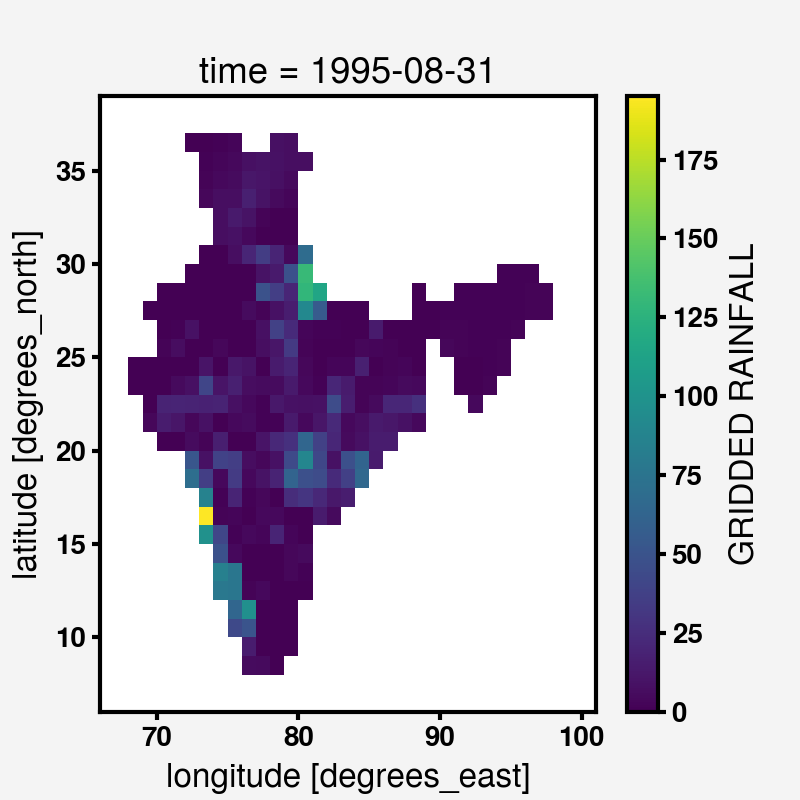

In [53]:
ds.rf.sel(time='1995-08-31T00:00:00.000000000').plot() # extracting a specific time slice and plotting it.

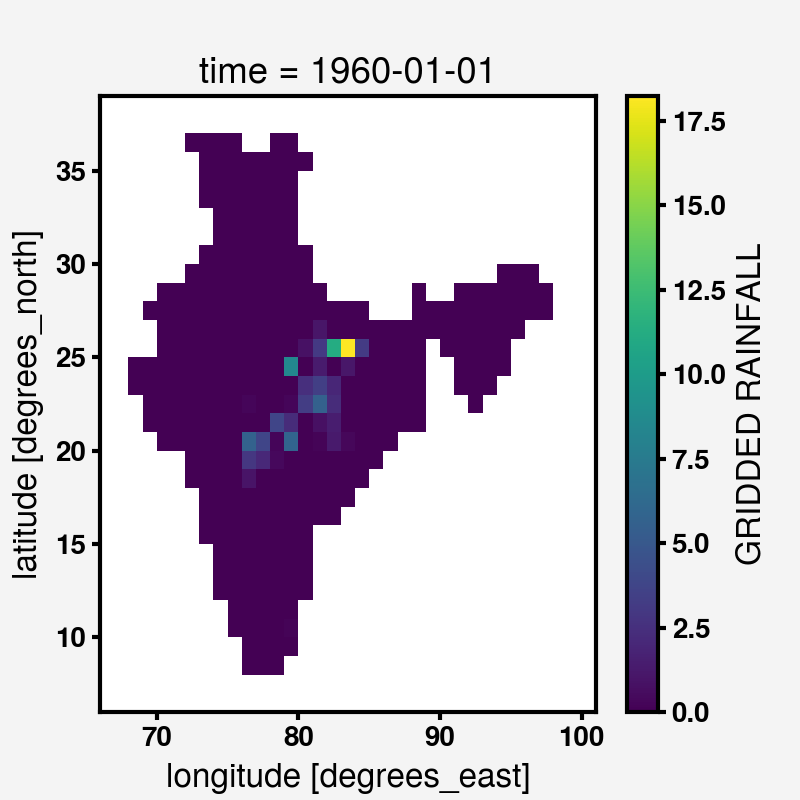

In [54]:
ds_sel_time_idx.plot() # Same as above but here we directly load the variable that we extracted earlier.

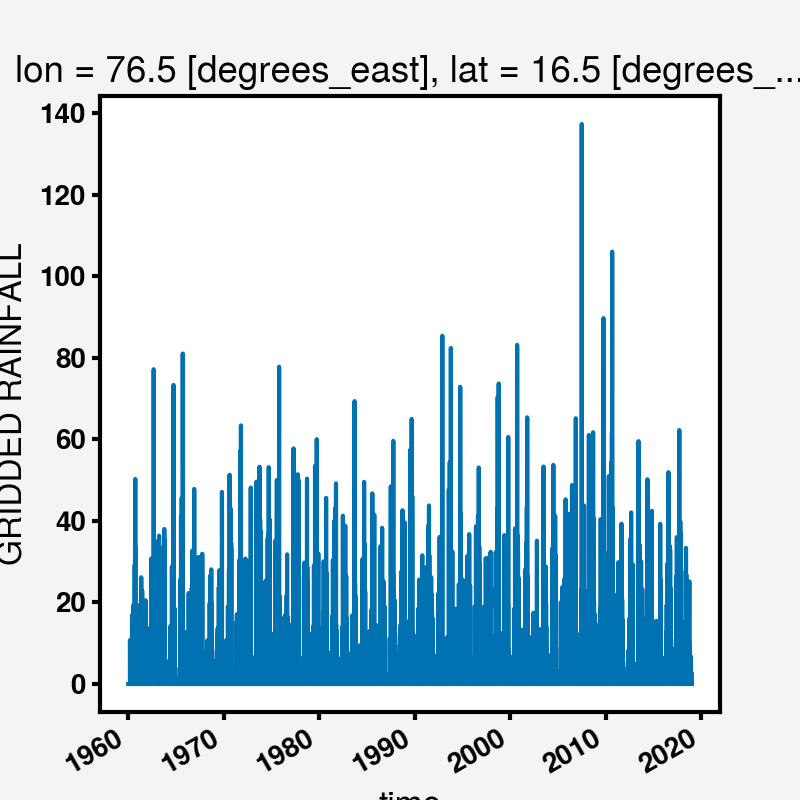

In [55]:
ds_sel_loc_idx.plot()

***Using the  globals() functions is to generate the variable names within a loop.***
**We will be rquiring to call variables within a loop as follows : if a variable is stored as ds_clim, we can use 
globals()['ds_clim'] to get the ds_clim variable**
***This command is very useful while plotting the data.***


# Using the Proplot package to generate publication qualilty plots

**Matplotlib is an extremely versatile plotting package used by scientists and engineers far and wide. However, matplotlib can be cumbersome or repetitive for users who…**

+ Make highly complex figures with many subplots.

+ Want to finely tune their annotations and aesthetics.

+ Need to make new figures nearly every day.

**More info on proplot can be found [here.](https://proplot.readthedocs.io/en/latest/index.html)**

/home/carbform/anaconda3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/carbform/anaconda3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


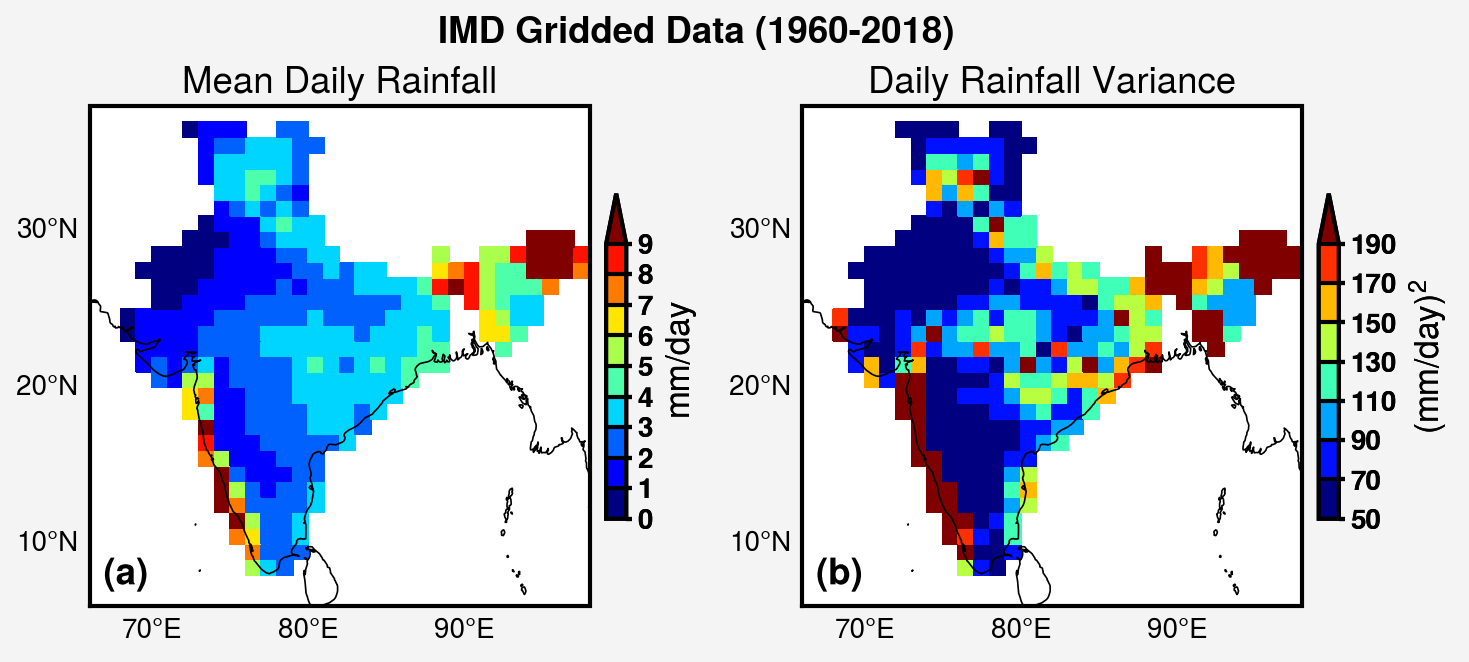

In [61]:
# Generate the figure and axis with nrows and ncols for subplots ###
fig, axs=plot.subplots(ncols=2,nrows=1, proj='cyl',tight=True) 

##### proj = 'cyl' is the Cylindrical Equidistant Map projection used by Cartopy ###


lat_min = 6 # # Minimum latitude on the map
lat_max = 38 # Maximum latitude on the map
lon_min = 66 # # Minimum longitude on the map
lon_max = 98 # # Maximum longitude on the map

cm = 'jet' # Colormap 'rainbow' , 'viridis', 'RdYlBu', 'RdBu' etc..
ex= 'max' # Color bar arrow ,'min', 'max', 'none','both'

#Now, we can format all the axes at once using these commands

axs.format(lonlim=(lon_min, lon_max), 
           latlim=(lat_min, lat_max), 
           labels=True,
           innerborders=False, 
           latlines=10, lonlines=10,
           abc='(a)', abcloc='ll', 
           gridminor=False,
           suptitle='IMD Gridded Data (1960-2018)' )

######## Limits as above; ### labels = True for lat lon labels,
###### inner borders = False , If True, it will show rivers #####
###latlines=1, lonlines=1  spacing ########
#abc=False, It abc='(a)', it will automatically give subplot (a),(b),(c) etc....
####abcloc='ll', abc location
#### gridminor=False; if true it will show all gridlines of lat , lon

# Subtitles for each plot
# We can declare the subtitles now and use it further
title=['Mean Daily Rainfall','Daily Rainfall Variance' ]

# We can declare varaible names now and use it further
vars =['ds_mean','ds_var']
levels_mean= np.arange(0,10,1)  # generates a sequence of numbers from 0 to 10 with  a spacing of 1
levels_var= np.arange(50,200,20) 
levels =['levels_mean','levels_var'] # for indexing later
labels = ['mm/day','$(mm/day)^2$'] # for indexing later

###########Subplots ################ 

#contourf for contours

#pcolormesh for psuedo color plot

#Each subplot axis is numbered as axs[0] or axs[1] etc....]

# We can loop over each plot by indexing it as axs[i] where i is the indexing variable

for i in range(0,2): 
        #######################
        
        m=axs[i].pcolor(globals()[vars[i]], # globals() and vars[i] are used to index and generate the variable name
        cmap=cm, # Colormap
        transform=ccrs.PlateCarree(), # cartopy map projection
        extend=ex,  #colorbar style
        levels = globals()[levels[i]] # using globals to get levels variable
        )
        axs[i].format(title=title[i])
        axs[i].coastlines() # adds coastlines
        axs[i].colorbar(m,loc='r',drawedges=True, width = 0.10 , length=0.65, label=labels[i]) 

  

# Colorbar

#fig.colorbar will ive 1 common colorbar for all plots. But for common colorbar give explict levels.

#Use axs[i].colorbar for individual colorbars ########  

# axs[1].colorbar(n,loc='b',drawedges=True, width = 0.10 , length=0.65, label= 'Rainfall')


In [62]:
# Saving the figures
# Use the desired file extesnsion (jpg, eps, png, svg etc.)
fig.savefig('1.svg')
#fig.savefig('1.png', dpi=600)